In [140]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from pathlib import Path
from functools import reduce

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [141]:
df = pd.read_csv('./corona_data_sets_modified/df_final.csv') 
df

,ags5,ags2,kreis,supermarkets_population,supermarkets_average_distance,public_transport_availability,average_distance_bus_stop,average_distance_train_station,average_distance_public_transport,Unnamed:_0,...,median_income,purchasing_power_per_household,purchasing_power_per_person,debtor_quota,household_in_income_calss_1,household_in_income_calss_2,household_in_income_calss_3,household_in_income_calss_4,household_in_income_calss_5,household_in_income_calss_6
0,1001,1,"Flensburg, Stadt",92,500,35,240,2901,240,0,...,2986,34496,19556,16.0,13209,12385,13092,5441,3096,3497
1,1002,1,"Kiel, Landeshauptstadt",92,460,37,268,2037,265,1,...,3304,35246,19612,12.1,22126,38523,39483,18567,11162,7841
2,1003,1,"Lübeck, Hansestadt",90,532,37,297,1927,294,2,...,3036,37219,20820,15.1,22881,30159,32571,15805,10999,9039
3,1004,1,"Neumünster, Stadt",85,588,37,316,1648,313,3,...,2842,38141,19561,17.9,7208,13291,10435,3812,3201,2805
4,10041,10,Regionalverband Saarbrücken,76,734,52,260,1804,255,318,...,3431,37046,19917,14.4,31031,44117,53073,24122,13716,11119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,9776,9,Lindau (Bodensee),63,1056,36,461,3039,441,313,...,3334,53011,27281,7.6,1899,4382,10928,7859,6828,10105
397,9777,9,Ostallgäu,59,1418,33,907,3726,837,314,...,3231,52358,25107,6.3,4076,8392,16455,11687,10814,15803
398,9778,9,Unterallgäu,58,1369,32,855,4129,805,315,...,3297,60441,27461,6.1,4051,6995,15103,12738,10743,15768
399,9779,9,Donau-Ries,51,1765,33,788,3800,760,316,...,3368,57645,25919,5.6,2530,7245,16893,12552,9634,11118


### Scaling the data

In [142]:
X = df.drop(["ags2","ags5","kreis"], 1)
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data

array([[ 1.43785315, -1.2448949 , -0.4875041 , ..., -0.50319801,
        -0.46613594, -0.4561535 ],
       [ 1.43785315, -1.32295755, -0.30446183, ...,  0.07085952,
        -0.09400719, -0.28489549],
       [ 1.31128546, -1.18244477, -0.30446183, ..., -0.04993485,
        -0.10152727, -0.23766549],
       ...,
       [-0.71379758,  0.45101622, -0.76206751, ..., -0.18406821,
        -0.11333795,  0.02761885],
       [-1.1567845 ,  1.22383647, -0.67054638, ..., -0.1922028 ,
        -0.16450219, -0.15570292],
       [-0.33409451,  0.10558898, -0.39598297, ..., -0.23125761,
        -0.07822885,  0.1136421 ]])

## PCA

In [143]:
pca = PCA(n_components=3)

In [144]:
pca.fit(X)

PCA(n_components=3)

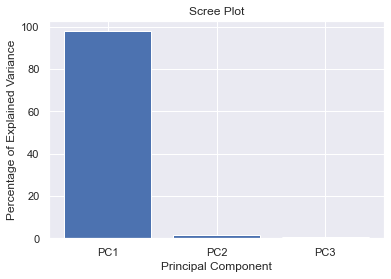

In [145]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [146]:
principalComponents = pca.fit_transform(X)
PCA_components = pd.DataFrame(principalComponents)
PCA_components

,0,1,2
0,-9.077349e+05,-1.443980e+03,109942.668291
1,-3.474347e+05,-1.489734e+05,-41926.527204
2,7.147000e+05,3.658538e+04,83976.145652
3,-1.068940e+06,2.167653e+04,80936.147933
4,-5.085298e+05,-2.986637e+05,-145684.402729
...,...,...,...
396,7.971825e+05,4.042399e+05,110206.926619
397,2.360049e+06,4.711740e+05,221156.337193
398,-1.284391e+05,1.480733e+05,-1279.660468
399,-8.445314e+05,-2.539959e+04,34893.296909


### Importance of each feature

In [147]:
pca_param = pd.DataFrame(pca.components_,columns=X.columns,index = ['PC-1','PC-2','PC-3'])
pca_param = pca_param.T


In [148]:
pca_param.sort_values(['PC-1'], ascending=[False])

,PC-1,PC-2,PC-3
guests_staying_overnight,0.915425,0.370547,-0.150785
number_of_guests,0.373235,-0.636572,0.654653
2019_population,0.080502,-0.357872,-0.412180
2018_population,0.079980,-0.356390,-0.413206
2018_women_population,0.040735,-0.181521,-0.209185
...,...,...,...
car_density,-0.000009,0.000075,-0.000071
supermarkets_average_distance,-0.000024,0.000617,0.000087
average_distance_train_station,-0.000050,0.000981,-0.000498
municipal_dept_per_capita,-0.000067,-0.000234,-0.000665


Text(0, 0.5, 'PCA 2')

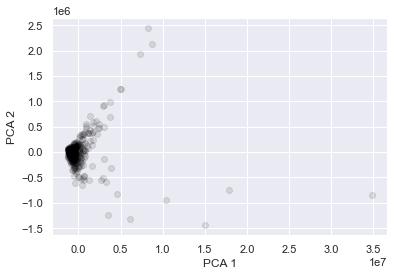

In [149]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

## Clustering 

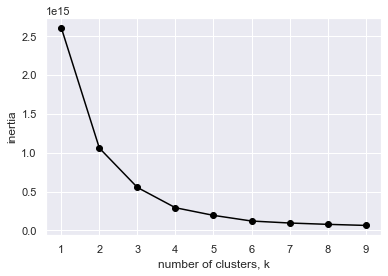

In [150]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [174]:
km = KMeans(n_clusters=3).fit(X)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = df.index.values
cluster_map['cluster'] = km.labels_
df = cluster_map.merge(df, left_on='data_index', right_index=True)

In [170]:
df

,data_index,data_index_x,cluster,data_index_y,data_index_x,cluster_x,data_index_y,cluster_y,ags5,ags2,...,median_income,purchasing_power_per_household,purchasing_power_per_person,debtor_quota,household_in_income_calss_1,household_in_income_calss_2,household_in_income_calss_3,household_in_income_calss_4,household_in_income_calss_5,household_in_income_calss_6
0,0,0,6,0,0,0,0,0,1001,1,...,2986,34496,19556,16.0,13209,12385,13092,5441,3096,3497
1,1,1,1,1,1,7,1,0,1002,1,...,3304,35246,19612,12.1,22126,38523,39483,18567,11162,7841
2,2,2,7,2,2,3,2,0,1003,1,...,3036,37219,20820,15.1,22881,30159,32571,15805,10999,9039
3,3,3,6,3,3,0,3,0,1004,1,...,2842,38141,19561,17.9,7208,13291,10435,3812,3201,2805
4,4,4,1,4,4,7,4,0,10041,10,...,3431,37046,19917,14.4,31031,44117,53073,24122,13716,11119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,396,396,9,396,396,8,396,0,9776,9,...,3334,53011,27281,7.6,1899,4382,10928,7859,6828,10105
397,397,397,8,397,397,9,397,2,9777,9,...,3231,52358,25107,6.3,4076,8392,16455,11687,10814,15803
398,398,398,1,398,398,7,398,0,9778,9,...,3297,60441,27461,6.1,4051,6995,15103,12738,10743,15768
399,399,399,6,399,399,0,399,0,9779,9,...,3368,57645,25919,5.6,2530,7245,16893,12552,9634,11118


In [171]:
df.loc[df['cluster'] == 0]

,data_index,data_index_x,cluster,data_index_y,data_index_x,cluster_x,data_index_y,cluster_y,ags5,ags2,...,median_income,purchasing_power_per_household,purchasing_power_per_person,debtor_quota,household_in_income_calss_1,household_in_income_calss_2,household_in_income_calss_3,household_in_income_calss_4,household_in_income_calss_5,household_in_income_calss_6
43,43,43,0,43,43,9,43,2,13072,13,...,2239,43022,20888,9.9,16794,23603,28905,14424,11793,8879
46,46,46,0,46,46,4,46,2,13075,13,...,2244,35525,18823,9.7,26198,36875,37329,12181,7503,5248
53,53,53,0,53,53,9,53,2,14612,14,...,2987,36642,19950,9.4,60046,87566,62994,39471,29437,22394
109,109,109,0,109,109,9,109,2,3241,3,...,3387,42502,22017,11.5,86658,118256,154892,91374,69094,79207
146,146,146,0,146,146,4,146,2,5111,5,...,3882,46609,26391,12.1,12281,52467,106706,68575,47808,62774
162,162,162,0,162,162,4,162,2,5315,5,...,3696,44374,22699,11.7,26970,91707,151147,98274,87897,99312
287,287,287,0,287,287,9,287,2,8315,8,...,3086,54246,25227,7.2,2472,8876,32104,29256,22895,26483
400,400,400,0,400,400,4,400,2,9780,9,...,2978,49376,25230,6.4,6889,11106,20213,11659,11504,17950


### Looking at the clusters

In [172]:
df.loc[df['cluster'] == 0]

,data_index,data_index_x,cluster,data_index_y,data_index_x,cluster_x,data_index_y,cluster_y,ags5,ags2,...,median_income,purchasing_power_per_household,purchasing_power_per_person,debtor_quota,household_in_income_calss_1,household_in_income_calss_2,household_in_income_calss_3,household_in_income_calss_4,household_in_income_calss_5,household_in_income_calss_6
43,43,43,0,43,43,9,43,2,13072,13,...,2239,43022,20888,9.9,16794,23603,28905,14424,11793,8879
46,46,46,0,46,46,4,46,2,13075,13,...,2244,35525,18823,9.7,26198,36875,37329,12181,7503,5248
53,53,53,0,53,53,9,53,2,14612,14,...,2987,36642,19950,9.4,60046,87566,62994,39471,29437,22394
109,109,109,0,109,109,9,109,2,3241,3,...,3387,42502,22017,11.5,86658,118256,154892,91374,69094,79207
146,146,146,0,146,146,4,146,2,5111,5,...,3882,46609,26391,12.1,12281,52467,106706,68575,47808,62774
162,162,162,0,162,162,4,162,2,5315,5,...,3696,44374,22699,11.7,26970,91707,151147,98274,87897,99312
287,287,287,0,287,287,9,287,2,8315,8,...,3086,54246,25227,7.2,2472,8876,32104,29256,22895,26483
400,400,400,0,400,400,4,400,2,9780,9,...,2978,49376,25230,6.4,6889,11106,20213,11659,11504,17950


In [173]:
df[['cluster', 'ags5']].groupby(['cluster']).agg(['count'])


,ags5
,count
cluster,
0,8
1,136
2,1
3,2
4,1
5,3
6,161
7,57


In [155]:
df.loc[df['cluster'] == 1]

,data_index,cluster,ags5,ags2,kreis,supermarkets_population,supermarkets_average_distance,public_transport_availability,average_distance_bus_stop,average_distance_train_station,...,median_income,purchasing_power_per_household,purchasing_power_per_person,debtor_quota,household_in_income_calss_1,household_in_income_calss_2,household_in_income_calss_3,household_in_income_calss_4,household_in_income_calss_5,household_in_income_calss_6
21,21,1,11000,11,Berlin,98,334,69,313,1130,...,3126,38190,20811,12.5,202077,345090,484494,343253,330279,280762
98,98,1,2000,2,Hamburg,94,443,66,295,1181,...,3619,46625,24879,10.5,43637,152776,259975,154457,143458,227898
306,306,1,9162,9,München,98,330,70,318,727,...,4169,53288,29432,9.0,5704,29352,151977,161041,182680,281801


In [156]:
df.loc[df['cluster'] == 2]

,data_index,cluster,ags5,ags2,kreis,supermarkets_population,supermarkets_average_distance,public_transport_availability,average_distance_bus_stop,average_distance_train_station,...,median_income,purchasing_power_per_household,purchasing_power_per_person,debtor_quota,household_in_income_calss_1,household_in_income_calss_2,household_in_income_calss_3,household_in_income_calss_4,household_in_income_calss_5,household_in_income_calss_6
12,12,2,1054,1,Nordfriesland,62,1445,34,792,3214,...,2768,50012,26306,9.8,7338,11367,25699,16935,12900,12744
13,13,2,1055,1,Ostholstein,64,1336,35,545,3492,...,2636,42842,23673,10.6,17821,18925,30089,17669,13301,13385
42,42,2,13071,13,Mecklenburgische Seenplatte,64,2002,31,665,3968,...,2325,37258,19580,10.4,28740,42844,35929,13036,9459,6082
43,43,2,13072,13,Landkreis Rostock,51,2173,37,821,2858,...,2239,43022,20888,9.9,16794,23603,28905,14424,11793,8879
44,44,2,13073,13,Vorpommern-Rügen,68,1535,33,589,3246,...,2194,36435,19806,10.9,23106,35590,32375,15034,9661,6338
46,46,2,13075,13,Vorpommern-Greifswald,67,1629,35,890,3008,...,2244,35525,18823,9.7,26198,36875,37329,12181,7503,5248
53,53,2,14612,14,Dresden,93,439,68,305,1547,...,2987,36642,19950,9.4,60046,87566,62994,39471,29437,22394
58,58,2,14713,14,Leipzig,96,376,69,329,1040,...,2807,33038,18566,13.2,85779,91184,70440,38443,25880,18564
109,109,2,3241,3,Hannover,86,639,49,440,2313,...,3387,42502,22017,11.5,86658,118256,154892,91374,69094,79207
133,133,2,3452,3,Aurich,53,1457,28,447,4532,...,2785,42639,21330,10.7,15731,15839,26502,15098,12357,9388
